In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import yfinance as yf

In [5]:
start = '2010-01-01'
end = '2023-12-31'
stock = 'GOOG'
data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [6]:
data.reset_index(inplace=True)

In [7]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.615220,15.678981,15.547723,15.610239,15.610239,78541293
1,2010-01-05,15.620949,15.637387,15.480475,15.541497,15.541497,120638494
2,2010-01-06,15.588072,15.588072,15.102393,15.149715,15.149715,159744526
3,2010-01-07,15.178109,15.193053,14.760922,14.797037,14.797037,257533695
4,2010-01-08,14.744733,15.024933,14.672753,14.994298,14.994298,189680313
...,...,...,...,...,...,...,...
3517,2023-12-22,142.130005,143.250000,142.054993,142.720001,142.720001,18494700
3518,2023-12-26,142.979996,143.945007,142.500000,142.820007,142.820007,11170100
3519,2023-12-27,142.830002,143.320007,141.050995,141.440002,141.440002,17288400
3520,2023-12-28,141.850006,142.270004,140.828003,141.279999,141.279999,12192500


In [8]:
ma_100_days = data.Close.rolling(100).mean()

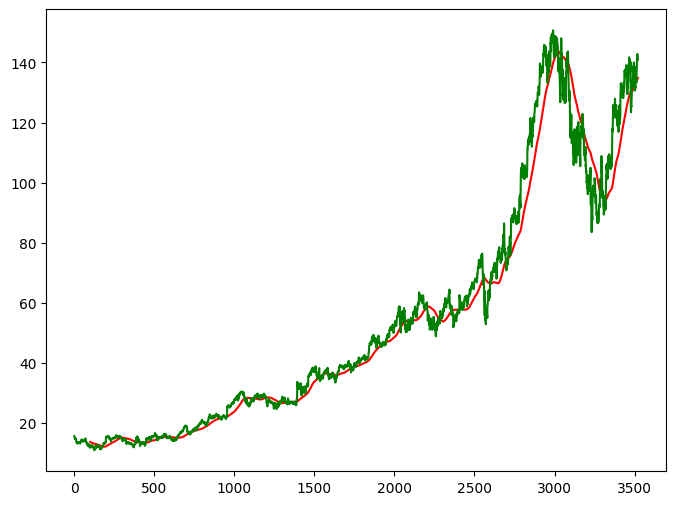

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [10]:
ma_200_days = data.Close.rolling(200).mean()

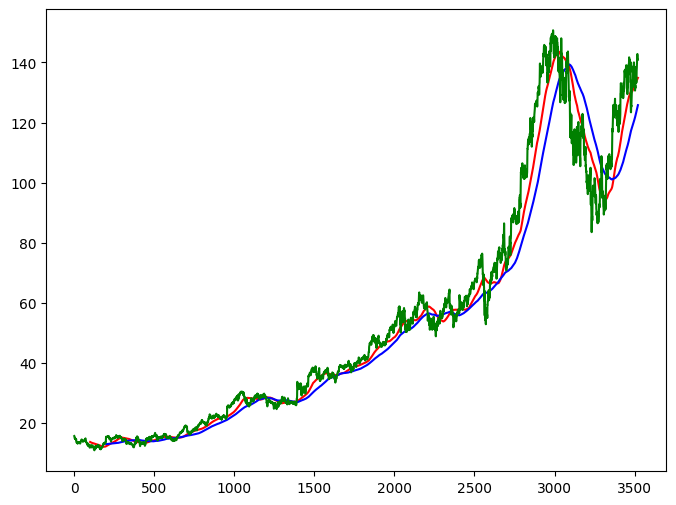

In [11]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [12]:
data.dropna(inplace=True)
# any null/missing values would be deleted.

In [13]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])
# 80 percent of the data for training, rest for the test

In [14]:
data_train.shape[0], data_test.shape[0]
# size of train and test data

(2817, 705)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [17]:
data_train_scale = scaler.fit_transform(data_train)

In [18]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i, 0])

In [19]:
pip install keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [20]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [21]:
x, y = np.array(x), np.array(y)

In [22]:
model = Sequential()
model.add(LSTM(units = 50, activation='relu', return_sequences=True,
               input_shape = ((x.shape[1], 1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 50, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

C:\Users\KIIT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [24]:
model.fit(x, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 20s 143ms/step - loss: 0.0429
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 13s 148ms/step - loss: 0.0085
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 144ms/step - loss: 0.0067
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 143ms/step - loss: 0.0062
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 13s 148ms/step - loss: 0.0057
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 144ms/step - loss: 0.0049
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 13s 153ms/step - loss: 0.0045
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 143ms/step - loss: 0.0040
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 145ms/step - loss: 0.0047
Epoch 10/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 147ms/step - loss: 0.0040
Epoch 11/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 146ms/step - loss: 0.0042
Epoch 12/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 13s 148ms/step - loss: 0.0040
Epoch 13/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 13s 147ms/step - loss: 0.0034
Epoch 14/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 145ms/step - loss: 0.0036
Epoch 15/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 14s 

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        26,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 325,235 (1.24 MB)

 Trainable params: 108,411 (423.48 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 216,824 (846.97 KB)

In [26]:
past_100_days = data_train.tail(100)

In [27]:
data_test = pd.concat([past_100_days, data_test], ignore_index=True)

In [28]:
data_test

,Close
0,76.730499
1,77.796501
2,79.665497
3,80.766502
4,82.050003
...,...
800,142.720001
801,142.820007
802,141.440002
803,141.279999


In [29]:
data_test_scale = scaler.fit_transform(data_test)

In [30]:
data_test_scale


array([[0.01201285],
       [0.02624936],
       [0.05120991],
       [0.0659139 ],
       [0.08305513],
       [0.04930017],
       [0.05852181],
       [0.        ],
       [0.03380163],
       [0.06970669],
       [0.07305881],
       [0.08920507],
       [0.15525917],
       [0.16476805],
       [0.16368627],
       [0.16452096],
       [0.14942306],
       [0.15764974],
       [0.15573327],
       [0.17388281],
       [0.17679424],
       [0.16929537],
       [0.15368995],
       [0.16513526],
       [0.15062496],
       [0.14573032],
       [0.16844733],
       [0.17015013],
       [0.1846804 ],
       [0.16301185],
       [0.18795905],
       [0.20789148],
       [0.20710356],
       [0.20791817],
       [0.20223561],
       [0.20161459],
       [0.17863052],
       [0.17275437],
       [0.17705468],
       [0.16255773],
       [0.16770607],
       [0.16452096],
       [0.15443783],
       [0.14315951],
       [0.14874192],
       [0.13814474],
       [0.14407439],
       [0.148

In [31]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i, 0])

In [32]:
x, y = np.array(x), np.array(y)

In [33]:
y_predict = model.predict(x)

23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step


In [34]:
scale = 1/scaler.scale_

In [35]:
y_predict = y_predict*scale

In [36]:
y = y*scale

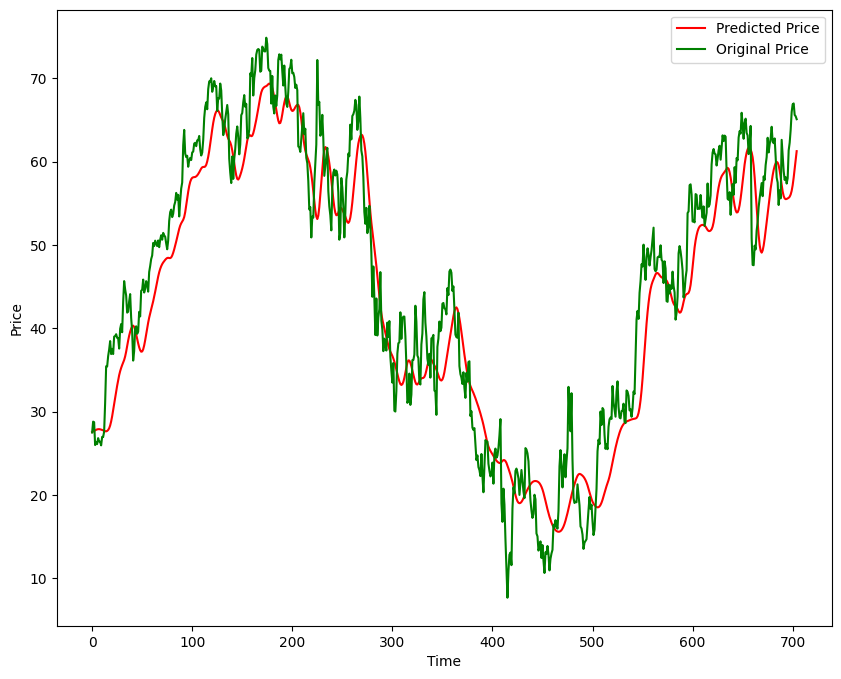

In [37]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label='Predicted Price')
plt.plot(y, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [45]:
model.save('Stock_Predictions_Model.keras')